<a href="https://colab.research.google.com/github/JeongJeong-code/P6_market_place/blob/main/text_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [389]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum
from google.colab import files
import pandas as pd
import seaborn as sns
import os.path
import missingno as mi
import re
import sklearn as sk
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import adjusted_rand_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.manifold import TSNE
from sklearn.metrics.cluster import homogeneity_score
from sklearn.decomposition import KernelPCA
from sklearn.cluster import (AgglomerativeClustering,
                             KMeans, DBSCAN, SpectralClustering)
from sklearn.metrics import davies_bouldin_score, silhouette_score
! {sys.executable} -m pip install ipynb

import cv2 as cv
from tqdm import tqdm

In [390]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [391]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [392]:
url = 'https://raw.githubusercontent.com/JeongJeong-code/P6_market_place/main/df_cat_prime.csv'
df1_test= pd.read_csv(url)
print(len(df1_test))
df1_test =df1_test[df1_test['image'] !='9743e6d1c9f3180483825fe4d2e97836.jpg']
print(len(df1_test))
df1_test.reset_index(inplace=True,drop=True)

1049
1048


In [393]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk.stem as stem
import string

In [394]:
df1_test.iloc[343]

Unnamed: 0                                                              344
product_name                   Anna Andre Paris Majesty Deodorant Combo Set
image                                  6e44d107ee32412243b19b0ed9b415f3.jpg
product_specifications    {"product_specification"=>[{"key"=>"Number of ...
categories                                         beauty and personal care
description               flipkart anna andre paris majesty deodorant co...
Name: 343, dtype: object

In [395]:
df1_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              1048 non-null   int64 
 1   product_name            1048 non-null   object
 2   image                   1048 non-null   object
 3   product_specifications  1048 non-null   object
 4   categories              1048 non-null   object
 5   description             1048 non-null   object
dtypes: int64(1), object(5)
memory usage: 49.2+ KB


In [396]:
lemma=1
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
stemmer = stem.PorterStemmer()
lemmatizer = stem.WordNetLemmatizer()
for i in range(len(df1_test)):
  df1_test.description[i] = nltk.word_tokenize(df1_test.description[i])
  if lemma ==1:
      df1_test.description[i] = [lemmatizer.lemmatize(t) for t in df1_test.description[i]]
  else :
      df1_test.description[i] = [stemmer.stem(t) for t in df1_test.description[i]]

  df1_test.description[i] = " ".join(df1_test.description[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [397]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
tokenize_desc = pd.Series(df1_test.description.str.lower().apply(tokenizer.tokenize),name ='tokenize_desc')

In [398]:
all_words = [word for tokens in tokenize_desc for word in tokens]
from collections import Counter
count_all_words = Counter(all_words)
most_common_words= [word for word, word_count in count_all_words.most_common(20)]

In [399]:
stopword_list  = nltk.corpus.stopwords.words('english') + most_common_words


In [400]:
stopword_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [401]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = pd.Series(le.fit_transform(df1_test.categories),name='class_labels')

In [402]:
list_labels = y
list_tokens = tokenize_desc

In [403]:
list_tokens

0       [feature, elegance, polyester, multicolor, abs...
1       [specification, sathiyas, cotton, bath, towel,...
2       [feature, eurospa, cotton, terry, face, towel,...
3       [feature, santosh, royal, fashion, cotton, pri...
4       [feature, jaipur, print, cotton, floral, king,...
                              ...                        
1043    [oren, empower, extra, large, self, adhesive, ...
1044    [wallmantra, large, vinyl, sticker, sticker, p...
1045    [uberlyfe, extra, large, pigmented, polyvinyl,...
1046    [wallmantra, medium, vinyl, sticker, sticker, ...
1047    [uberlyfe, large, vinyl, sticker, online, uber...
Name: tokenize_desc, Length: 1048, dtype: object

In [404]:
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(df1_test.description,y, test_size=0.1, random_state=40)
X_train =df1_test.description
y_train = y

In [405]:
img_path = "/content/drive/MyDrive/P6_market_place/Images"
train = df1_test
labels = train.categories.unique()

dico = []
prob = []
for leaf in train.image:
    img = cv.imread(img_path +'/'+ str(leaf),cv.IMREAD_GRAYSCALE)
    orb = cv.ORB_create()
    kp = orb.detect(img,None)

    kp, des = orb.compute(img, kp)
    if len(kp)==0:
      prob.append(leaf)
      des= []
    


    for d in des:
      dico.append(d)

In [406]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.neural_network import MLPClassifier
k = np.size(labels) * 10

batch_size = np.size(os.listdir(img_path)) * 3
kmeans = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, verbose=1).fit(dico)


Init 1/3 with method k-means++
Inertia for init 1/3: 1412442297.0
Init 2/3 with method k-means++
Inertia for init 2/3: 1415223899.0
Init 3/3 with method k-means++
Inertia for init 3/3: 1400604911.0
Minibatch step 1/15982: mean batch inertia: 147224.30444444445
Minibatch step 2/15982: mean batch inertia: 111958.69299346897, ewa inertia: 111958.69299346897
Minibatch step 3/15982: mean batch inertia: 110366.15329476718, ewa inertia: 111938.76418319525
Minibatch step 4/15982: mean batch inertia: 109571.32032723623, ewa inertia: 111909.13833494947
Minibatch step 5/15982: mean batch inertia: 109106.50950080421, ewa inertia: 111874.0666451518
Minibatch step 6/15982: mean batch inertia: 108974.26627744146, ewa inertia: 111837.77896490943
Minibatch step 7/15982: mean batch inertia: 109433.79549209586, ewa inertia: 111807.6958652103
Minibatch step 8/15982: mean batch inertia: 108011.87409883366, ewa inertia: 111760.19550344435
Minibatch step 9/15982: mean batch inertia: 108755.3279449601, ewa in

In [407]:
kmeans.verbose = False
histo_list = []

for leaf in train.image:
    img = cv.imread(img_path +'/'+ str(leaf) )
    kp, des = orb.detectAndCompute(img, None)

    histo = np.zeros(k)
    nkp = np.size(kp)

    for d in des:
        idx = kmeans.predict([d])
        histo[idx] += 1/nkp # Because we need normalized histograms, I prefere to add 1/nkp directly

    histo_list.append(histo)

In [408]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\w+',stop_words=stopword_list)

bow = dict()
bow["train"] = (count_vectorizer.fit_transform(X_train), y_train)
#bow["test"]  = (count_vectorizer.transform(X_test), y_test)
print(bow["train"][0].shape)
#print(bow["test"][0].shape)

(1048, 4202)


In [409]:
X_train_word =count_vectorizer.fit_transform(X_train)

In [410]:
np.shape(X_train_word)

(1048, 4202)

In [411]:

X_train_word_df = pd.DataFrame.sparse.from_spmatrix(X_train_word)
X_train_image = pd.DataFrame(histo_list)
X = pd.concat([X_train_word_df,X_train_image],axis=1)

In [412]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


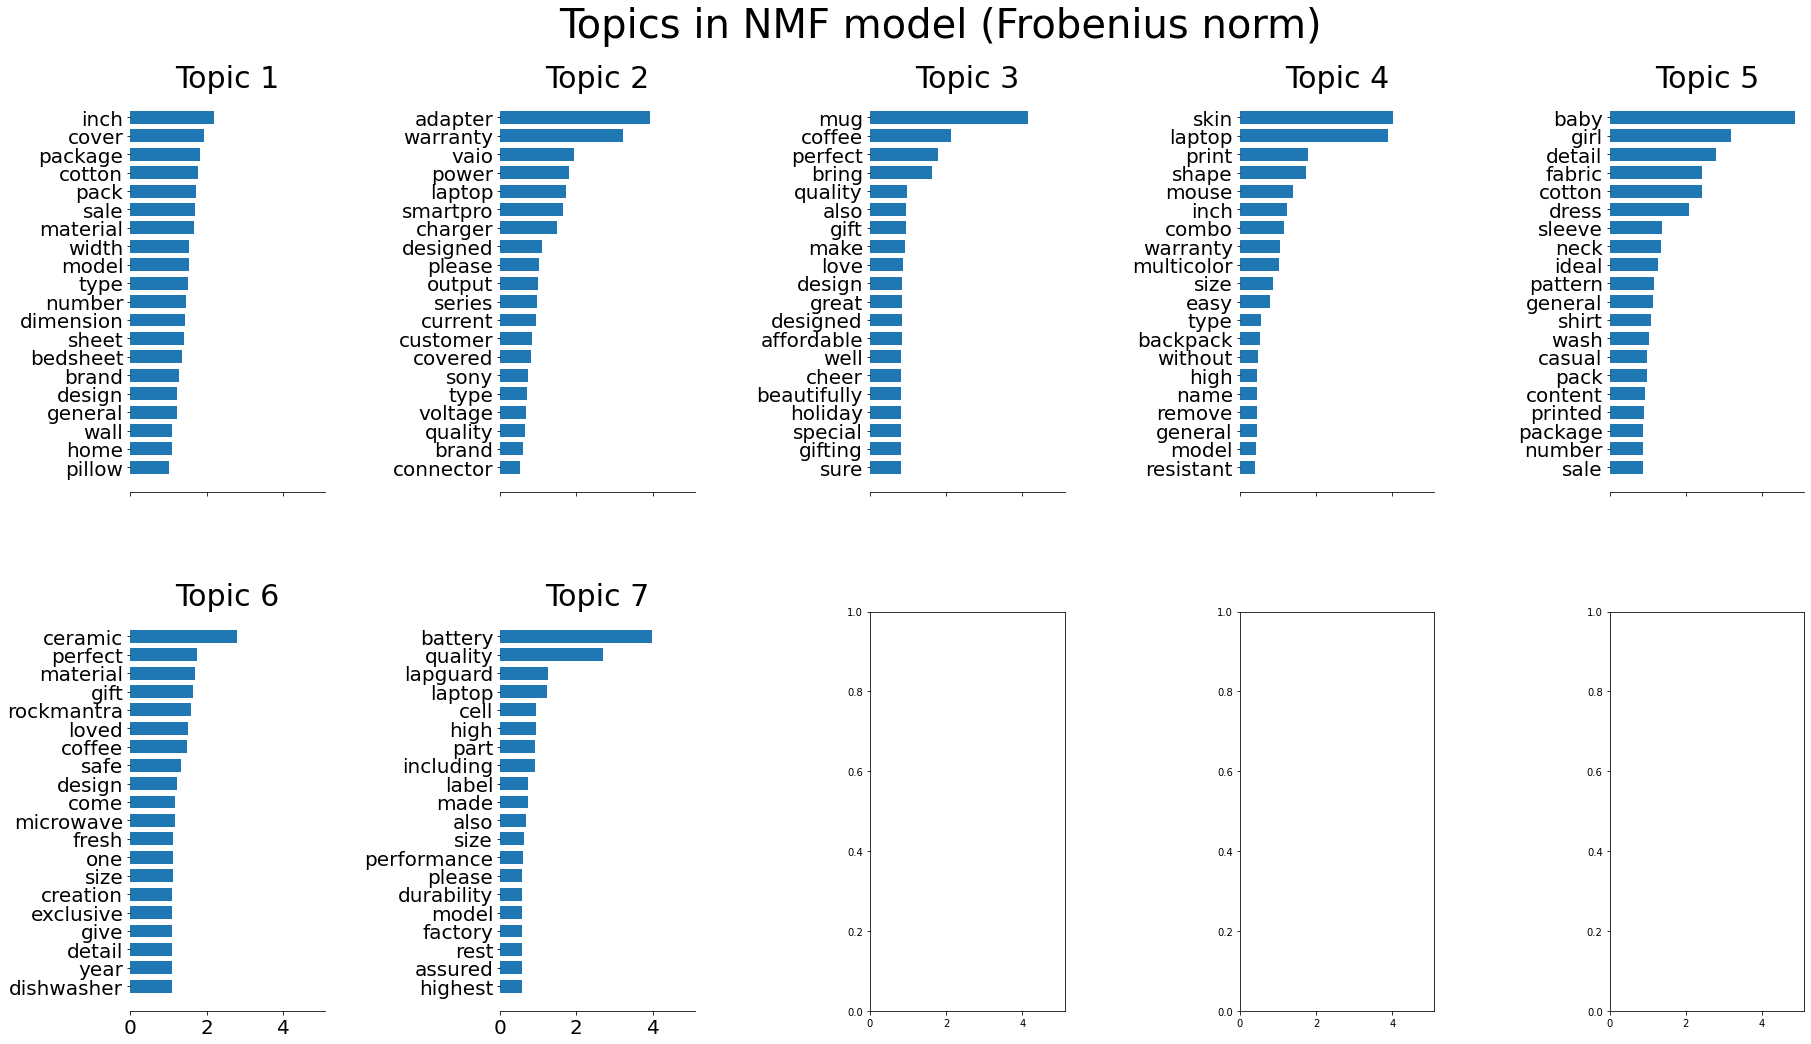

In [413]:
from sklearn.decomposition import NMF, LatentDirichletAllocation
#n_samples = 2000
#n_features = 1000
n_components = 7
n_top_words = 20
nmf = NMF(n_components=n_components, random_state=1, alpha=0.1, l1_ratio=0.5).fit(X_train_word)
tfidf_feature_names = count_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


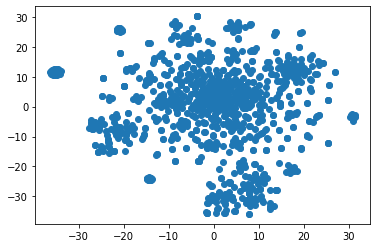

In [414]:
from sklearn.manifold import TSNE
tsne_2d = TSNE(n_components=2, perplexity=50)
X_tsne = tsne_2d.fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

In [415]:
np.shape(X_tsne)

(1048, 2)

In [416]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
gb= GaussianNB()
nb = MultinomialNB()
from sklearn.model_selection import cross_val_score
cross_val_score(gb, X_tsne,y_train, cv=5, scoring='accuracy',error_score = 'raise')



array([0.56666667, 0.6952381 , 0.66190476, 0.54066986, 0.55023923])

In [417]:
labels_=gb.fit(X_tsne,y_train).predict(X_tsne)
gb_labels = pd.Series(labels_)

In [418]:
df1_test.categories.nunique()

7

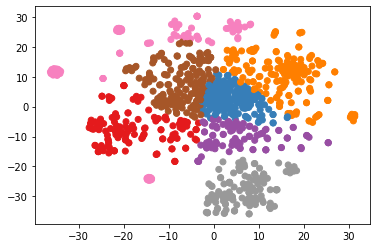

In [419]:
results = np.c_[X_tsne,labels_]
pd_result = pd.DataFrame(results)
plt.scatter(pd_result[0], pd_result[1], c=pd_result[2], cmap='Set1')

In [420]:
pd.crosstab(y_train,gb_labels)

col_0,0,1,2,3,4,5,6
class_labels,,,,,,,
0,94,19,6,4,27,0,0
1,13,80,14,28,15,0,0
2,5,48,45,22,26,3,0
3,3,11,15,110,8,2,0
4,30,8,6,0,98,8,0
5,5,12,19,16,8,90,0
6,0,2,1,0,0,0,147


In [421]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(analyzer='word', token_pattern=r'\w+',stop_words=stopword_list)

tfidf = dict()
tfidf["train"] = (tfidf_vectorizer.fit_transform(X_train), y_train)
#tfidf["test"]  = (tfidf_vectorizer.transform(X_test), y_test)

In [422]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()

In [423]:
nb_classifier.fit(*bow["train"])

MultinomialNB()

In [424]:
from sklearn.model_selection import cross_val_score
cross_val_score(nb_classifier, *bow["train"], cv=5, scoring='accuracy')

array([0.87619048, 0.95714286, 0.90952381, 0.74162679, 0.77511962])

In [425]:
nb_classifier_tfidf = MultinomialNB()
nb_classifier_tfidf.fit(*tfidf["train"])
cross_val_score(nb_classifier_tfidf, *tfidf["train"], cv=5, scoring='accuracy')

array([0.92857143, 0.97142857, 0.91428571, 0.72727273, 0.80382775])

In [426]:
#concat tfidf et vector_count
#kmeans pour retrouver les cat
#tsne pour reduc_dimension
#commencer le traitement d'image

Implémentation Kmeans


In [427]:
from sklearn.cluster import KMeans
kmeans = KMeans()

In [428]:
kmeans= KMeans(n_clusters=df1_test.categories.nunique()).fit(X_tsne)

In [429]:
pd.crosstab(index=y_train, columns=kmeans.labels_)

col_0,0,1,2,3,4,5,6
class_labels,,,,,,,
0,0,3,2,89,41,4,11
1,0,32,8,5,71,20,14
2,0,14,10,0,76,4,45
3,0,96,17,3,13,3,17
4,0,0,29,15,63,33,10
5,0,12,57,11,9,38,23
6,139,0,0,0,2,0,9
